Build a Logistic Regression Model to predict whether a bacteria would be inhibitory or not based on biofilm thickness.

I am basing this code off of the datacamp tutorial "Understanding Logistic Regression in Python"
https://www.datacamp.com/datalab/w/11b0dd9d-49be-429d-992e-45f73b3c23fb#roc-curve

Confusion Matrix:
[[9 1]
 [1 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15



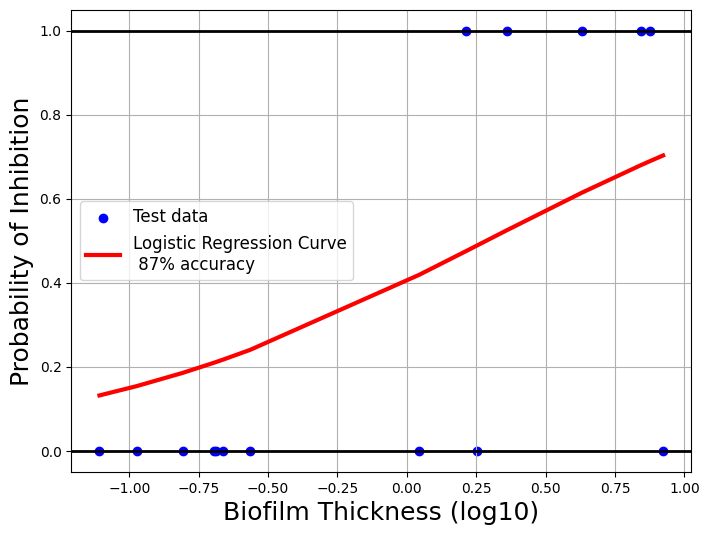

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/Users/chloegolde/Desktop/stats/dat_scaled_final.csv", low_memory=False)


#build logistic regression model where biofilm thickness predicts inhibition
#split dataset in features and target variable
X = df[['CV_log10']]  
y = df['Inhibitory'] 

# split X and y into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using confusion matrix
print("Confusion Matrix:")
matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
classification = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Sort X_test for smooth plotting of logistic regression curve
X_test_sorted = X_test.sort_values(by='CV_log10')

# Plot the logistic regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test_sorted, model.predict_proba(X_test_sorted)[:, 1], color='red', linewidth=3, label='Logistic Regression Curve\n 87% accuracy')
plt.axhline(y=1, color='black', linestyle='-', linewidth=2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xlabel('Biofilm Thickness (log10)', fontsize=18)
plt.ylabel('Probability of Inhibition', fontsize=18)
#plt.title('Logistic Regression for Biofilm Thickness and Inhibition', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

Text(0.5, 13.52222222222222, 'Predicted label')

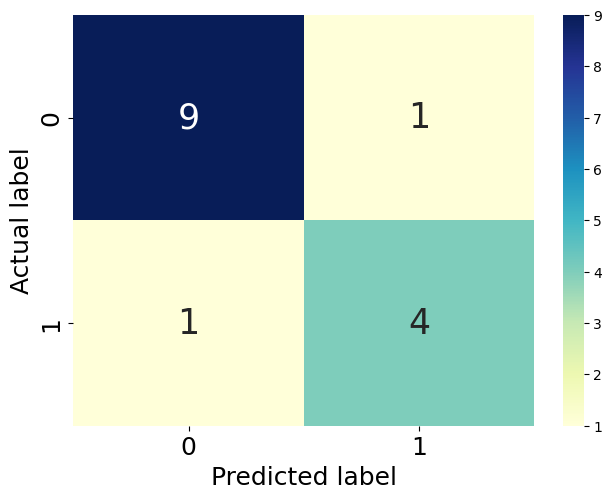

In [30]:
#build heat map to visualize confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=18)
plt.yticks(tick_marks, class_names, fontsize=18)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, annot_kws={"size": 25}, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)

#Text(0.5,257.44,'Predicted label');

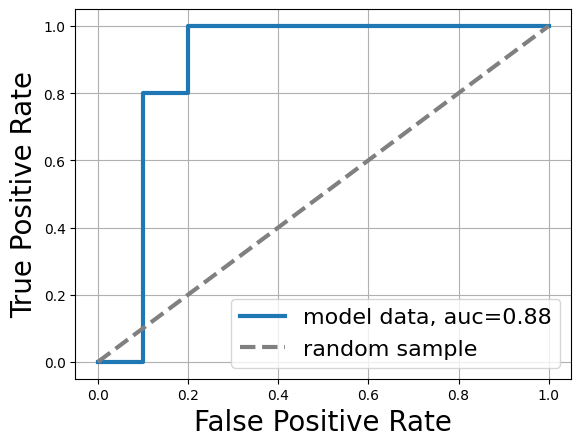

In [31]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,linewidth=3, label="model data, auc="+str(round(auc, 2)))
plt.plot([0, 1], [0, 1], color='gray', linewidth=3, linestyle='--', label="random sample")
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
#plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=22)
plt.grid(True)
plt.legend(loc=4, fontsize=16)
plt.show()